In [1]:
import numpy as np
import pandas as pd

In [2]:
lebron = pd.read_csv('data/NBA/1_lebron_james_shot_chart_1_2023.csv')
james = pd.read_csv('data/NBA/2_james_harden_shot_chart_2023.csv')
stephen = pd.read_csv('data/NBA/3_stephen_curry_shot_chart_2023.csv')

print(lebron.shape)
print(james.shape)
print(stephen.shape)

(1533, 15)
(1025, 15)
(1434, 15)


In [3]:
lebron.info

<bound method DataFrame.info of       top  left          date      qtr time_remaining  result  shot_type  \
0     310   203  Oct 18, 2022  1st Qtr          09:26   False          3   
1     213   259  Oct 18, 2022  1st Qtr          08:38   False          2   
2     143   171  Oct 18, 2022  1st Qtr          08:10   False          2   
3      68   215  Oct 18, 2022  1st Qtr          05:24    True          2   
4      66   470  Oct 18, 2022  1st Qtr          01:02   False          3   
...   ...   ...           ...      ...            ...     ...        ...   
1528  118   274  May 22, 2023  4th Qtr          06:49   False          2   
1529  109   221  May 22, 2023  4th Qtr          05:03   False          2   
1530   78   254  May 22, 2023  4th Qtr          03:20    True          2   
1531   78    46  May 22, 2023  4th Qtr          00:26   False          2   
1532   58   192  May 22, 2023  4th Qtr          00:01   False          2   

      distance_ft   lead  lebron_team_score  opponent_t

In [4]:
lebron.dtypes

top                     int64
left                    int64
date                   object
qtr                    object
time_remaining         object
result                   bool
shot_type               int64
distance_ft             int64
lead                     bool
lebron_team_score       int64
opponent_team_score     int64
opponent               object
team                   object
season                  int64
color                  object
dtype: object

In [5]:
lebron.head()

,top,left,date,qtr,time_remaining,result,shot_type,distance_ft,lead,lebron_team_score,opponent_team_score,opponent,team,season,color
0,310,203,"Oct 18, 2022",1st Qtr,09:26,False,3,26,False,2,2,GSW,LAL,2023,red
1,213,259,"Oct 18, 2022",1st Qtr,08:38,False,2,16,False,4,5,GSW,LAL,2023,red
2,143,171,"Oct 18, 2022",1st Qtr,08:10,False,2,11,False,4,7,GSW,LAL,2023,red
3,68,215,"Oct 18, 2022",1st Qtr,05:24,True,2,3,False,12,19,GSW,LAL,2023,green
4,66,470,"Oct 18, 2022",1st Qtr,01:02,False,3,23,False,22,23,GSW,LAL,2023,red


In [6]:
# okay wow very clean. i wanna clean some data! lol

stephen.isnull().sum()

top                    0
left                   0
date                   0
qtr                    0
time_remaining         0
result                 0
shot_type              0
distance_ft            0
lead                   0
lebron_team_score      0
opponent_team_score    0
opponent               0
team                   0
season                 0
color                  0
dtype: int64

In [7]:
print('duplicates:', lebron.duplicated().sum())

lebron[lebron.duplicated()]
lebron = lebron.drop_duplicates()


duplicates: 1


(array([524., 162.,  91.,  62.,  60., 106.,  56., 373.,  81.,  17.]),
 array([ 0. ,  3.4,  6.8, 10.2, 13.6, 17. , 20.4, 23.8, 27.2, 30.6, 34. ]),
 <BarContainer object of 10 artists>)

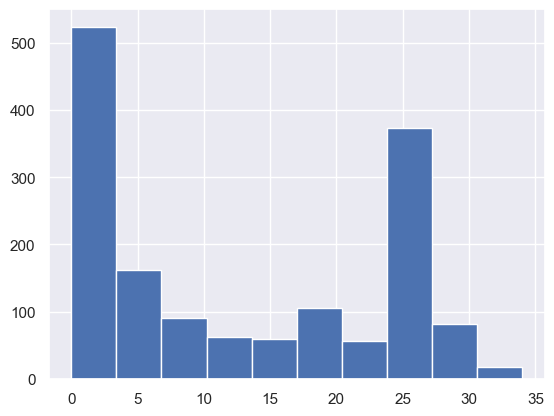

In [8]:
import matplotlib.pyplot as plt
import seaborn; seaborn.set()  # set plot styles
import seaborn as sns 

plt.hist(lebron['distance_ft'])


/Users/mark/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='distance_ft'>

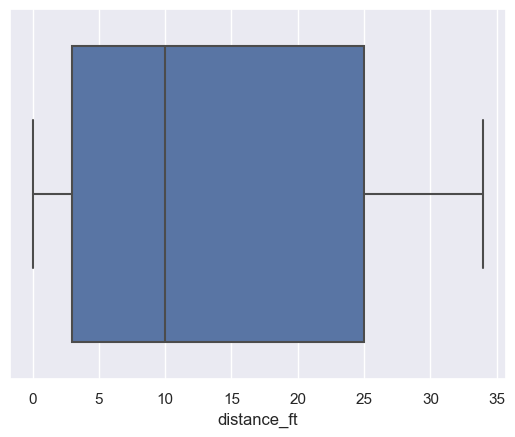

In [49]:
sns.boxplot(x=lebron['distance_ft'])

# what is the black bar in this telling me?
# bell curve?

/var/folders/5x/1n063tsx6jx9wzcy34jzlqzh0000gn/T/ipykernel_66247/1150873872.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(lebron['distance_ft'], kde=False, rug=True);
/Users/mark/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/mark/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating 

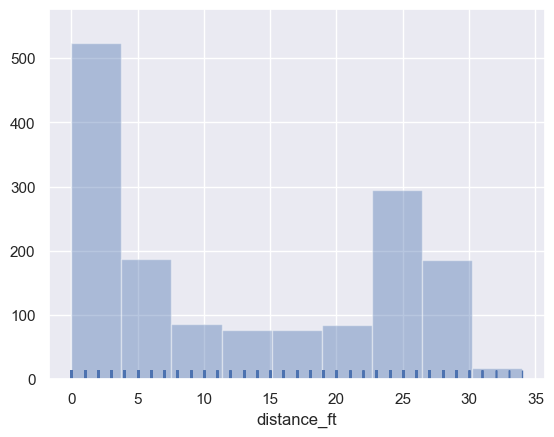

In [51]:
# let's see a bell curve with the standard deviation identified

sns.distplot(lebron['distance_ft'], kde=False, rug=True);

In [10]:
# this is really interesting and fun data, i want to come back to it this week

In [11]:
# none of these DFs have a column that marks the player
# so before concat, I think I need to manually add that column

#players = pd.concat([lebron, james, stephen])
#players

In [12]:
# Updated from last version, much more effecient way of creating a hierarchy

lebron.index.rename('Shot Number', inplace=True)
james.index.rename('Shot Number', inplace=True)
stephen.index.rename('Shot Number', inplace=True)

players = pd.concat([james, lebron, stephen], keys=['James', 'Lebron', 'Stephen'])
players.index.names = ['Player', 'Shot Number']
players


top  left          date      qtr time_remaining  result  \
Player  Shot Number                                                            
James   0            323   329  Oct 18, 2022  1st Qtr           8:52   False   
        1            340   265  Oct 18, 2022  1st Qtr           4:08    True   
        2            304   318  Oct 18, 2022  1st Qtr           2:51    True   
        3            116   280  Oct 18, 2022  1st Qtr           2:21    True   
        4            320   188  Oct 18, 2022  2nd Qtr           6:21    True   
...                  ...   ...           ...      ...            ...     ...   
Stephen 1429         185    79  May 12, 2023  4th Qtr           8:34   False   
        1430         193    19  May 12, 2023  4th Qtr           8:28   False   
        1431         332   214  May 12, 2023  4th Qtr           6:23   False   
        1432         310   240  May 12, 2023  4th Qtr           6:11    True   
        1433         329   283  May 12, 2023  4th Qtr           4:29    True   

                     shot_type  distance_ft   lead  lebron_team_score  \
Player  Shot Number                                                     
James   0                    3           28  False                  2   
        1                    3           29   True                 18   
        2                    3           26   True                 22   
        3                    2            7   True                 25   
        4                    3           27   True                 45   
...                        ...          ...    ...                ...   
Stephen 1429                 2           21  False                 80   
        1430                 3           26  False                 80   
        1431                 3           28  False                 85   
        1432                 3           26  False                 88   
        1433                 3           28  False                 94   

                     opponent_team_score opponent team  season  color  
Player  Shot Number                                                    
James   0                              9      BOS  PHI    2023    red  
        1                             17      BOS  PHI    2023  green  
        2                             17      BOS  PHI    2023  green  
        3                             17      BOS  PHI    2023  green  
        4                             43      BOS  PHI    2023  green  
...                                  ...      ...  ...     ...    ...  
Stephen 1429                         100      LAL  GSW    2023    red  
        1430                         100      LAL  GSW    2023    red  
        1431                         108      LAL  GSW    2023    red  
        1432                         108      LAL  GSW    2023  green  
        1433                         111      LAL  GSW    2023  green  

[3991 rows x 15 columns]

In [13]:
# date is an object, lets fix that

players.dtypes


top                     int64
left                    int64
date                   object
qtr                    object
time_remaining         object
result                   bool
shot_type               int64
distance_ft             int64
lead                     bool
lebron_team_score       int64
opponent_team_score     int64
opponent               object
team                   object
season                  int64
color                  object
dtype: object

In [14]:
players['date'] = pd.to_datetime(players['date'])
players.dtypes

top                             int64
left                            int64
date                   datetime64[ns]
qtr                            object
time_remaining                 object
result                           bool
shot_type                       int64
distance_ft                     int64
lead                             bool
lebron_team_score               int64
opponent_team_score             int64
opponent                       object
team                           object
season                          int64
color                          object
dtype: object

In [15]:
players[players.date >= '2023-05-05']

top  left       date      qtr time_remaining  result  \
Player  Shot Number                                                         
James   953          286   111 2023-05-05  1st Qtr           8:38    True   
        954          109   243 2023-05-05  1st Qtr           8:11   False   
        955           47   253 2023-05-05  1st Qtr           4:17   False   
        956          318   290 2023-05-05  2nd Qtr           9:17   False   
        957          126   257 2023-05-05  2nd Qtr           8:17   False   
...                  ...   ...        ...      ...            ...     ...   
Stephen 1429         185    79 2023-05-12  4th Qtr           8:34   False   
        1430         193    19 2023-05-12  4th Qtr           8:28   False   
        1431         332   214 2023-05-12  4th Qtr           6:23   False   
        1432         310   240 2023-05-12  4th Qtr           6:11    True   
        1433         329   283 2023-05-12  4th Qtr           4:29    True   

                     shot_type  distance_ft   lead  lebron_team_score  \
Player  Shot Number                                                     
James   953                  3           27  False                  7   
        954                  2            6  False                  7   
        955                  2            1  False                 16   
        956                  3           27   True                 36   
        957                  2            8  False                 36   
...                        ...          ...    ...                ...   
Stephen 1429                 2           21  False                 80   
        1430                 3           26  False                 80   
        1431                 3           28  False                 85   
        1432                 3           26  False                 88   
        1433                 3           28  False                 94   

                     opponent_team_score opponent team  season  color  
Player  Shot Number                                                    
James   953                           14      BOS  PHI    2023  green  
        954                           14      BOS  PHI    2023    red  
        955                           24      BOS  PHI    2023    red  
        956                           33      BOS  PHI    2023    red  
        957                           38      BOS  PHI    2023    red  
...                                  ...      ...  ...     ...    ...  
Stephen 1429                         100      LAL  GSW    2023    red  
        1430                         100      LAL  GSW    2023    red  
        1431                         108      LAL  GSW    2023    red  
        1432                         108      LAL  GSW    2023  green  
        1433                         111      LAL  GSW    2023  green  

[321 rows x 15 columns]

In [16]:
players.dropna().describe()

,top,left,date,shot_type,distance_ft,lebron_team_score,opponent_team_score,season
count,3991.000000,3991.000000,3991,3991.000000,3991.000000,3991.000000,3991.000000,3991.0
mean,175.138812,245.342771,2023-01-31 21:12:56.647457024,2.444500,15.833375,60.256076,59.183663,2023.0
min,26.000000,-3.000000,2022-10-18 00:00:00,2.000000,0.000000,0.000000,0.000000,2023.0
25%,73.000000,197.000000,2022-12-09 00:00:00,2.000000,4.000000,32.000000,31.000000,2023.0
50%,159.000000,241.000000,2023-01-27 00:00:00,2.000000,18.000000,61.000000,59.000000,2023.0
75%,279.000000,301.000000,2023-04-02 00:00:00,3.000000,26.000000,89.000000,88.000000,2023.0
max,389.000000,483.000000,2023-05-22 00:00:00,3.000000,36.000000,140.000000,135.000000,2023.0
std,101.817086,104.633224,NaN,0.496972,10.814200,34.783247,34.789839,0.0


In [17]:
# Stephen Curry, king of three-pointers!

players[(players.distance_ft > 33) & (players.result == True)]

top  left       date      qtr time_remaining  result  \
Player  Shot Number                                                         
Stephen 41           384   344 2022-10-21  4th Qtr           1:11    True   
        851          362   370 2023-03-15  1st Qtr           0:27    True   
        920          358    93 2023-03-20  2nd Qtr           4:33    True   

                     shot_type  distance_ft   lead  lebron_team_score  \
Player  Shot Number                                                     
Stephen 41                   3           35  False                114   
        851                  3           34  False                 23   
        920                  3           34   True                 44   

                     opponent_team_score opponent team  season  color  
Player  Shot Number                                                    
Stephen 41                           121      DEN  GSW    2023  green  
        851                           25      LAC  GSW    2023  green  
        920                           40      HOU  GSW    2023  green

In [18]:
import matplotlib.pyplot as plt
import seaborn; seaborn.set()  # set plot styles
import seaborn as sns

/Users/mark/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='distance_ft'>

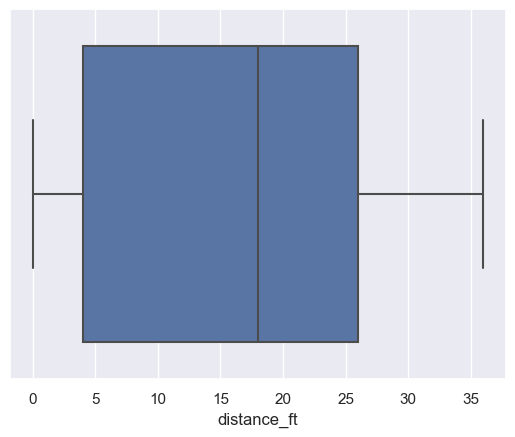

In [19]:
sns.boxplot(x=players['distance_ft'])

In [20]:
players = players.rename(columns={'lebron_team_score':'home_team_score'})

players.head()

top  left       date      qtr time_remaining  result  \
Player Shot Number                                                         
James  0            323   329 2022-10-18  1st Qtr           8:52   False   
       1            340   265 2022-10-18  1st Qtr           4:08    True   
       2            304   318 2022-10-18  1st Qtr           2:51    True   
       3            116   280 2022-10-18  1st Qtr           2:21    True   
       4            320   188 2022-10-18  2nd Qtr           6:21    True   

                    shot_type  distance_ft   lead  home_team_score  \
Player Shot Number                                                   
James  0                    3           28  False                2   
       1                    3           29   True               18   
       2                    3           26   True               22   
       3                    2            7   True               25   
       4                    3           27   True               45   

                    opponent_team_score opponent team  season  color  
Player Shot Number                                                    
James  0                              9      BOS  PHI    2023    red  
       1                             17      BOS  PHI    2023  green  
       2                             17      BOS  PHI    2023  green  
       3                             17      BOS  PHI    2023  green  
       4                             43      BOS  PHI    2023  green

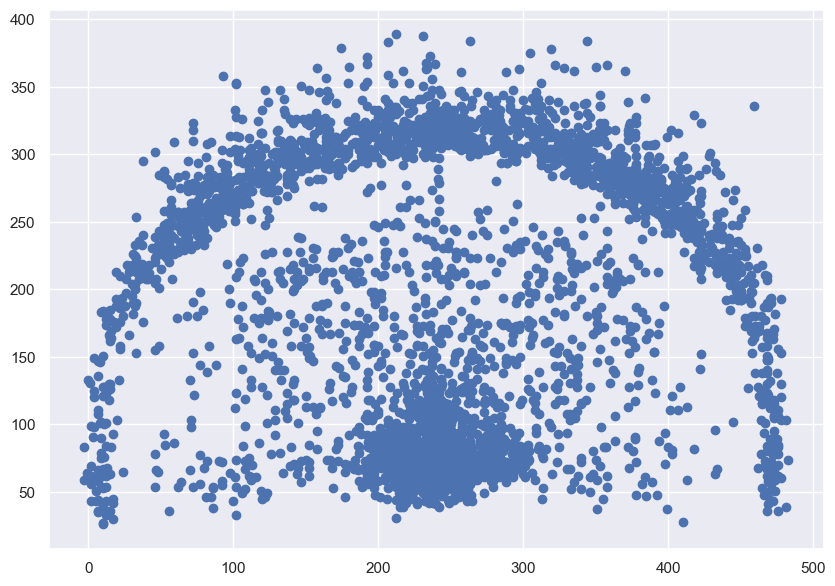

In [21]:
fig, pl = plt.subplots(figsize=(10,7))
pl.scatter(players.left, players.top)
plt.show()

In [22]:
idx = pd.IndexSlice

james_top = players.loc[idx['James',:], 'top']
james_left = players.loc[idx['James',:], 'left']

stephen_top = players.loc[idx['Stephen',:], 'top']
stephen_left = players.loc[idx['Stephen',:], 'left']

lebron_top = players.loc[idx['Lebron',:], 'top']
lebron_left = players.loc[idx['Lebron',:], 'left']

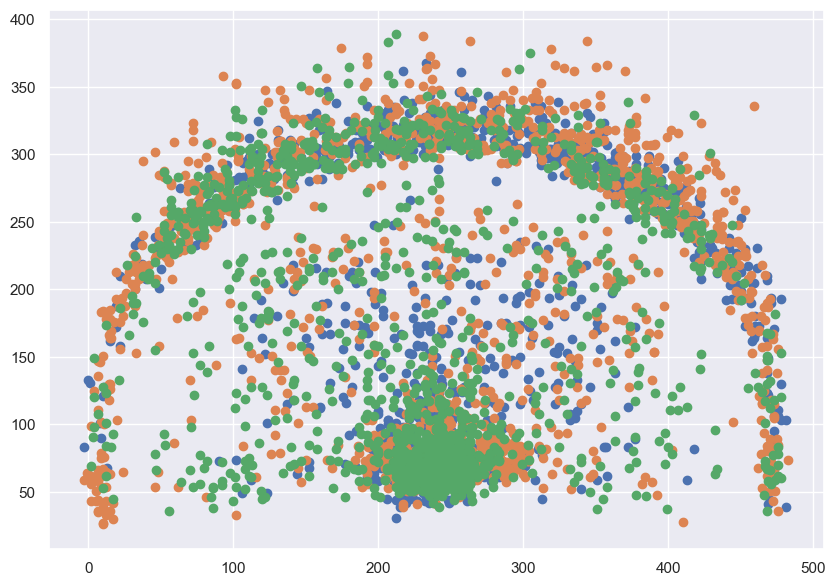

In [23]:
# shot taken

fig, pl = plt.subplots(figsize=(10,7))
pl.scatter(james_left, james_top)
pl.scatter(stephen_left, stephen_top)
pl.scatter(lebron_left, lebron_top)
plt.show()

In [24]:
swish = players[players.result == True]

james_top = swish.loc[idx['James',:], 'top']
james_left = swish.loc[idx['James',:], 'left']

stephen_top = swish.loc[idx['Stephen',:], 'top']
stephen_left = swish.loc[idx['Stephen',:], 'left']

lebron_top = swish.loc[idx['Lebron',:], 'top']
lebron_left = swish.loc[idx['Lebron',:], 'left']

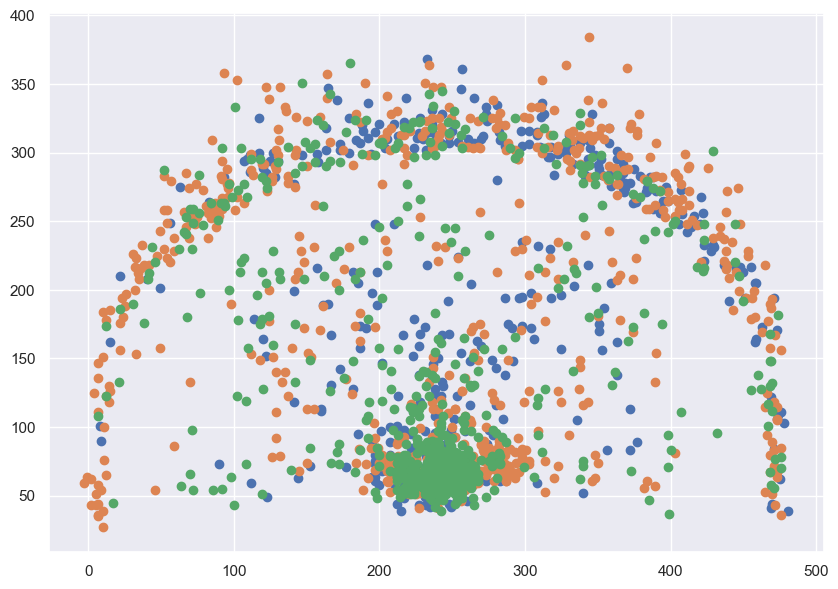

In [25]:
# only shots made

fig, pl = plt.subplots(figsize=(10,7))
pl.scatter(james_left, james_top)
pl.scatter(stephen_left, stephen_top)
pl.scatter(lebron_left, lebron_top)
plt.show()

In [ ]:
# what are the success rates of each player in regards to the angle of the shot > 5 ft away from basket?

In [26]:
swish.head()

top  left       date      qtr time_remaining  result  \
Player Shot Number                                                         
James  1            340   265 2022-10-18  1st Qtr           4:08    True   
       2            304   318 2022-10-18  1st Qtr           2:51    True   
       3            116   280 2022-10-18  1st Qtr           2:21    True   
       4            320   188 2022-10-18  2nd Qtr           6:21    True   
       7            336   192 2022-10-18  2nd Qtr           0:48    True   

                    shot_type  distance_ft   lead  home_team_score  \
Player Shot Number                                                   
James  1                    3           29   True               18   
       2                    3           26   True               22   
       3                    2            7   True               25   
       4                    3           27   True               45   
       7                    3           29  False               61   

                    opponent_team_score opponent team  season  color  
Player Shot Number                                                    
James  1                             17      BOS  PHI    2023  green  
       2                             17      BOS  PHI    2023  green  
       3                             17      BOS  PHI    2023  green  
       4                             43      BOS  PHI    2023  green  
       7                             61      BOS  PHI    2023  green

In [27]:
swish.groupby(level=0)['distance_ft'].describe()    # nice! we can use level= to specify an index to group by on MultiIndex.

,count,mean,std,min,25%,50%,75%,max
Player,,,,,,,,
James,443.0,15.288939,10.784082,0.0,4.0,16.0,26.0,32.0
Lebron,768.0,9.191406,9.894678,0.0,2.0,3.0,18.0,32.0
Stephen,703.0,16.256046,10.793445,0.0,5.0,19.0,26.0,35.0


In [28]:
swish.groupby(level=0)['shot_type'].mean()

Player
James      2.433409
Lebron     2.197917
Stephen    2.467994
Name: shot_type, dtype: float64

In [29]:
lebron.head()

,top,left,date,qtr,time_remaining,result,shot_type,distance_ft,lead,lebron_team_score,opponent_team_score,opponent,team,season,color
Shot Number,,,,,,,,,,,,,,,
0,310,203,"Oct 18, 2022",1st Qtr,09:26,False,3,26,False,2,2,GSW,LAL,2023,red
1,213,259,"Oct 18, 2022",1st Qtr,08:38,False,2,16,False,4,5,GSW,LAL,2023,red
2,143,171,"Oct 18, 2022",1st Qtr,08:10,False,2,11,False,4,7,GSW,LAL,2023,red
3,68,215,"Oct 18, 2022",1st Qtr,05:24,True,2,3,False,12,19,GSW,LAL,2023,green
4,66,470,"Oct 18, 2022",1st Qtr,01:02,False,3,23,False,22,23,GSW,LAL,2023,red


In [30]:
lebron['date'] = pd.to_datetime(lebron['date'])
lebron['date']
lebron['date'].dt.day_name()
lebron['day_of_week'] = lebron['date'].dt.day_name()
lebron.head()
 

/var/folders/5x/1n063tsx6jx9wzcy34jzlqzh0000gn/T/ipykernel_66247/1539381154.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lebron['date'] = pd.to_datetime(lebron['date'])
/var/folders/5x/1n063tsx6jx9wzcy34jzlqzh0000gn/T/ipykernel_66247/1539381154.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lebron['day_of_week'] = lebron['date'].dt.day_name()


,top,left,date,qtr,time_remaining,result,shot_type,distance_ft,lead,lebron_team_score,opponent_team_score,opponent,team,season,color,day_of_week
Shot Number,,,,,,,,,,,,,,,,
0,310,203,2022-10-18,1st Qtr,09:26,False,3,26,False,2,2,GSW,LAL,2023,red,Tuesday
1,213,259,2022-10-18,1st Qtr,08:38,False,2,16,False,4,5,GSW,LAL,2023,red,Tuesday
2,143,171,2022-10-18,1st Qtr,08:10,False,2,11,False,4,7,GSW,LAL,2023,red,Tuesday
3,68,215,2022-10-18,1st Qtr,05:24,True,2,3,False,12,19,GSW,LAL,2023,green,Tuesday
4,66,470,2022-10-18,1st Qtr,01:02,False,3,23,False,22,23,GSW,LAL,2023,red,Tuesday


In [31]:
# playing with pivot tables

lebron.pivot_table('result', index='distance_ft', columns='qtr')

qtr,1st OT,1st Qtr,2nd OT,2nd Qtr,3rd Qtr,4th Qtr
distance_ft,,,,,,
0,NaN,0.600000,NaN,0.833333,0.750000,0.666667
1,1.000000,1.000000,NaN,0.900000,0.833333,0.800000
2,0.666667,0.611111,NaN,0.821429,0.773585,0.823529
3,0.600000,0.562500,NaN,0.682927,0.766667,0.756757
4,NaN,0.461538,0.0,0.590909,0.478261,0.428571
5,0.000000,0.500000,NaN,0.600000,0.250000,0.333333
6,1.000000,0.428571,NaN,0.555556,0.600000,0.266667
7,NaN,0.428571,NaN,0.400000,0.500000,0.200000
8,NaN,0.750000,NaN,0.333333,0.375000,0.571429


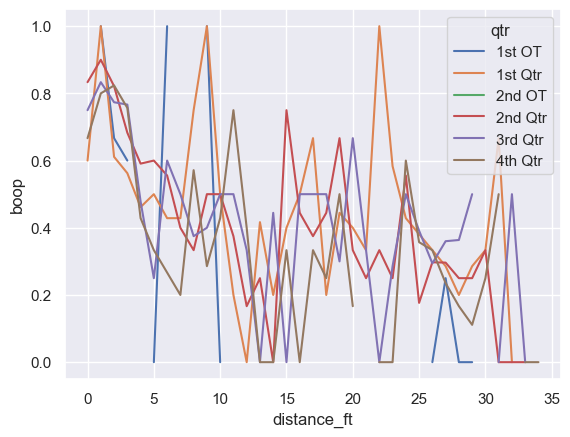

In [32]:
sns.set()  # use Seaborn styles
lebron.pivot_table('result', index='distance_ft', columns='qtr').plot()
plt.ylabel('boop');

In [33]:
# learning about datetime in Pandas with this NBA journal

lebron['date'] = pd.to_datetime(lebron['date'], format='%Y-%m-%d') # converting this column to datetime

# it's already formatted well, but if it wasn't
# you'd use format= keyword then time string code of date values

lebron['date']
lebron['date'].dt.day_name() # show day of the week for these values
lebron['day_of_week'] = lebron['date'].dt.day_name() # adding day_of_the_week column just for fun
lebron.head()
 

/var/folders/5x/1n063tsx6jx9wzcy34jzlqzh0000gn/T/ipykernel_66247/583787723.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lebron['date'] = pd.to_datetime(lebron['date'], format='%Y-%m-%d') # converting this column to datetime
/var/folders/5x/1n063tsx6jx9wzcy34jzlqzh0000gn/T/ipykernel_66247/583787723.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lebron['day_of_week'] = lebron['date'].dt.day_name() # adding day_of_the_week column just for fun


,top,left,date,qtr,time_remaining,result,shot_type,distance_ft,lead,lebron_team_score,opponent_team_score,opponent,team,season,color,day_of_week
Shot Number,,,,,,,,,,,,,,,,
0,310,203,2022-10-18,1st Qtr,09:26,False,3,26,False,2,2,GSW,LAL,2023,red,Tuesday
1,213,259,2022-10-18,1st Qtr,08:38,False,2,16,False,4,5,GSW,LAL,2023,red,Tuesday
2,143,171,2022-10-18,1st Qtr,08:10,False,2,11,False,4,7,GSW,LAL,2023,red,Tuesday
3,68,215,2022-10-18,1st Qtr,05:24,True,2,3,False,12,19,GSW,LAL,2023,green,Tuesday
4,66,470,2022-10-18,1st Qtr,01:02,False,3,23,False,22,23,GSW,LAL,2023,red,Tuesday


In [34]:
lebron['date'].min()    # viewing the earliest date

Timestamp('2022-10-18 00:00:00')

In [35]:
lebron['date'].max()    # viewing the most recent date

Timestamp('2023-05-22 00:00:00')

In [36]:
lebron['date'].max() - lebron['date'].min()     # getting time delta between two days

Timedelta('216 days 00:00:00')

In [37]:
# creating a filter for datetime

filt = (lebron['date'] >= '05-18-2023') 
lebron.loc[filt]

,top,left,date,qtr,time_remaining,result,shot_type,distance_ft,lead,lebron_team_score,opponent_team_score,opponent,team,season,color,day_of_week
Shot Number,,,,,,,,,,,,,,,,
1470,44,252,2023-05-18,1st Qtr,06:49,True,2,1,True,16,15,DEN,LAL,2023,green,Thursday
1471,57,262,2023-05-18,2nd Qtr,11:47,True,2,2,True,29,27,DEN,LAL,2023,green,Thursday
1472,69,244,2023-05-18,2nd Qtr,09:22,True,2,2,True,36,27,DEN,LAL,2023,green,Thursday
1473,63,273,2023-05-18,2nd Qtr,08:55,False,2,4,True,36,30,DEN,LAL,2023,red,Thursday
1474,68,220,2023-05-18,2nd Qtr,05:46,False,2,3,True,45,36,DEN,LAL,2023,red,Thursday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1528,118,274,2023-05-22,4th Qtr,06:49,False,2,8,False,98,102,DEN,LAL,2023,red,Monday
1529,109,221,2023-05-22,4th Qtr,05:03,False,2,6,False,100,102,DEN,LAL,2023,red,Monday
1530,78,254,2023-05-22,4th Qtr,03:20,True,2,3,False,104,107,DEN,LAL,2023,green,Monday


In [38]:
# creating a a range of dates for datetime

filt = (lebron['date'] == '01-02-2023')
lebron.loc[filt]

,top,left,date,qtr,time_remaining,result,shot_type,distance_ft,lead,lebron_team_score,opponent_team_score,opponent,team,season,color,day_of_week
Shot Number,,,,,,,,,,,,,,,,
617,113,210,2023-01-02,1st Qtr,08:47,True,2,7,True,9,5,CHO,LAL,2023,green,Monday
618,210,254,2023-01-02,1st Qtr,07:46,True,2,16,True,14,5,CHO,LAL,2023,green,Monday
619,309,216,2023-01-02,1st Qtr,07:19,False,3,26,True,14,7,CHO,LAL,2023,red,Monday
620,243,414,2023-01-02,1st Qtr,05:33,False,3,26,True,18,12,CHO,LAL,2023,red,Monday
621,72,257,2023-01-02,1st Qtr,04:52,False,2,3,True,18,12,CHO,LAL,2023,red,Monday
622,71,254,2023-01-02,2nd Qtr,09:34,True,2,2,True,31,21,CHO,LAL,2023,green,Monday
623,82,312,2023-01-02,2nd Qtr,09:07,True,2,8,True,34,21,CHO,LAL,2023,green,Monday
624,209,233,2023-01-02,2nd Qtr,08:31,False,2,16,True,34,21,CHO,LAL,2023,red,Monday
625,331,243,2023-01-02,2nd Qtr,08:17,False,3,28,True,34,21,CHO,LAL,2023,red,Monday


In [39]:
lebron1 = lebron.set_index('date')
lebron1.sort_index(inplace=True)

In [40]:
# this should work, not sure why it's causing an error here.

try:
    lebron1['2022']
except KeyError:
    print('sorry bruv issa KeyError ight?')

sorry bruv issa KeyError ight?


In [41]:
#playtime = players.set_index(['Player', 'date'])
#playtime.head()

In [42]:
players_reset = players.reset_index()
playtime = players_reset.set_index(['date', 'qtr'])
playtime.head()

Player  Shot Number  top  left time_remaining  result  \
date       qtr                                                             
2022-10-18 1st Qtr  James            0  323   329           8:52   False   
           1st Qtr  James            1  340   265           4:08    True   
           1st Qtr  James            2  304   318           2:51    True   
           1st Qtr  James            3  116   280           2:21    True   
           2nd Qtr  James            4  320   188           6:21    True   

                    shot_type  distance_ft   lead  home_team_score  \
date       qtr                                                       
2022-10-18 1st Qtr          3           28  False                2   
           1st Qtr          3           29   True               18   
           1st Qtr          3           26   True               22   
           1st Qtr          2            7   True               25   
           2nd Qtr          3           27   True               45   

                    opponent_team_score opponent team  season  color  
date       qtr                                                        
2022-10-18 1st Qtr                    9      BOS  PHI    2023    red  
           1st Qtr                   17      BOS  PHI    2023  green  
           1st Qtr                   17      BOS  PHI    2023  green  
           1st Qtr                   17      BOS  PHI    2023  green  
           2nd Qtr                   43      BOS  PHI    2023  green

In [43]:
playtime.loc['2023']

Player  Shot Number  top  left time_remaining  result  \
date       qtr                                                               
2023-01-02 1st Qtr    James          304   80   220           8:03   False   
           1st Qtr    James          305   70   293           6:00   False   
           1st Qtr    James          306   74   242           4:45    True   
           1st Qtr    James          307   59   308           3:29    True   
           2nd Qtr    James          308  301   165          10:49   False   
...                     ...          ...  ...   ...            ...     ...   
2023-05-12 4th Qtr  Stephen         1429  185    79           8:34   False   
           4th Qtr  Stephen         1430  193    19           8:28   False   
           4th Qtr  Stephen         1431  332   214           6:23   False   
           4th Qtr  Stephen         1432  310   240           6:11    True   
           4th Qtr  Stephen         1433  329   283           4:29    True   

                    shot_type  distance_ft   lead  home_team_score  \
date       qtr                                                       
2023-01-02 1st Qtr          2            3   True               12   
           1st Qtr          2            6   True               16   
           1st Qtr          2            2   True               20   
           1st Qtr          2            7   True               22   
           2nd Qtr          3           26   True               33   
...                       ...          ...    ...              ...   
2023-05-12 4th Qtr          2           21  False               80   
           4th Qtr          3           26  False               80   
           4th Qtr          3           28  False               85   
           4th Qtr          3           26  False               88   
           4th Qtr          3           28  False               94   

                    opponent_team_score opponent team  season  color  
date       qtr                                                        
2023-01-02 1st Qtr                    9      NOP  PHI    2023    red  
           1st Qtr                   15      NOP  PHI    2023    red  
           1st Qtr                   18      NOP  PHI    2023  green  
           1st Qtr                   21      NOP  PHI    2023  green  
           2nd Qtr                   28      NOP  PHI    2023    red  
...                                 ...      ...  ...     ...    ...  
2023-05-12 4th Qtr                  100      LAL  GSW    2023    red  
           4th Qtr                  100      LAL  GSW    2023    red  
           4th Qtr                  108      LAL  GSW    2023    red  
           4th Qtr                  108      LAL  GSW    2023  green  
           4th Qtr                  111      LAL  GSW    2023  green  

[2553 rows x 15 columns]

In [44]:
players_reset.head()

,Player,Shot Number,top,left,date,qtr,time_remaining,result,shot_type,distance_ft,lead,home_team_score,opponent_team_score,opponent,team,season,color
0,James,0,323,329,2022-10-18,1st Qtr,8:52,False,3,28,False,2,9,BOS,PHI,2023,red
1,James,1,340,265,2022-10-18,1st Qtr,4:08,True,3,29,True,18,17,BOS,PHI,2023,green
2,James,2,304,318,2022-10-18,1st Qtr,2:51,True,3,26,True,22,17,BOS,PHI,2023,green
3,James,3,116,280,2022-10-18,1st Qtr,2:21,True,2,7,True,25,17,BOS,PHI,2023,green
4,James,4,320,188,2022-10-18,2nd Qtr,6:21,True,3,27,True,45,43,BOS,PHI,2023,green


In [45]:
#players_reset['qtr'][players_reset['qtr'] == '1st Qtr']

players_reset.replace({'1st Qtr':1, '2nd Qtr':2, '3rd Qtr':3, '4th Qtr':4, '1st OT':5, '2nd OT': 6}, inplace=True)
players_reset['qtr'].astype(int)

0       1
1       1
2       1
3       1
4       2
       ..
3986    4
3987    4
3988    4
3989    4
3990    4
Name: qtr, Length: 3991, dtype: int64

In [46]:
# successfully converted qtr to int
# using 5 and 6 to refer to the overtime quarters, when applicable

players_reset.dtypes

Player                         object
Shot Number                     int64
top                             int64
left                            int64
date                   datetime64[ns]
qtr                             int64
time_remaining                 object
result                           bool
shot_type                       int64
distance_ft                     int64
lead                             bool
home_team_score                 int64
opponent_team_score             int64
opponent                       object
team                           object
season                          int64
color                          object
dtype: object

In [47]:
playtime2 = players_reset.set_index(['date', 'qtr'])
playtime2


Player  Shot Number  top  left time_remaining  result  \
date       qtr                                                           
2022-10-18 1      James            0  323   329           8:52   False   
           1      James            1  340   265           4:08    True   
           1      James            2  304   318           2:51    True   
           1      James            3  116   280           2:21    True   
           2      James            4  320   188           6:21    True   
...                 ...          ...  ...   ...            ...     ...   
2023-05-12 4    Stephen         1429  185    79           8:34   False   
           4    Stephen         1430  193    19           8:28   False   
           4    Stephen         1431  332   214           6:23   False   
           4    Stephen         1432  310   240           6:11    True   
           4    Stephen         1433  329   283           4:29    True   

                shot_type  distance_ft   lead  home_team_score  \
date       qtr                                                   
2022-10-18 1            3           28  False                2   
           1            3           29   True               18   
           1            3           26   True               22   
           1            2            7   True               25   
           2            3           27   True               45   
...                   ...          ...    ...              ...   
2023-05-12 4            2           21  False               80   
           4            3           26  False               80   
           4            3           28  False               85   
           4            3           26  False               88   
           4            3           28  False               94   

                opponent_team_score opponent team  season  color  
date       qtr                                                    
2022-10-18 1                      9      BOS  PHI    2023    red  
           1                     17      BOS  PHI    2023  green  
           1                     17      BOS  PHI    2023  green  
           1                     17      BOS  PHI    2023  green  
           2                     43      BOS  PHI    2023  green  
...                             ...      ...  ...     ...    ...  
2023-05-12 4                    100      LAL  GSW    2023    red  
           4                    100      LAL  GSW    2023    red  
           4                    108      LAL  GSW    2023    red  
           4                    108      LAL  GSW    2023  green  
           4                    111      LAL  GSW    2023  green  

[3991 rows x 15 columns]

In [48]:
# for the love of all that is good, i can't figure out how to slice the qtr index
# without returning an error

idx = pd.IndexSlice

playtime2.loc[idx['2022'], 1:3]

TypeError: cannot do slice indexing on Index with these indexers [1] of type int